In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import copy
import math

# **Q1:**

In [98]:
# LOAD DATA
url = 'https://raw.githubusercontent.com/igilad/ML_HW1_DATA/main/virus_data.csv'
df = pd.read_csv(url)
df.shape

(3000, 29)

# **Q2:**

In [99]:
df['num_of_siblings'].value_counts()

2.0    754
1.0    707
3.0    554
0.0    400
4.0    272
5.0    120
6.0     29
7.0      7
8.0      2
9.0      1
Name: num_of_siblings, dtype: int64

**Answer:** This feature's meaning is the patient's number of siblings. Feature type: ordinal, since the value is a natural number and there is order on natural numbers, which is relevant here too.

# **Q5:**

In [100]:
# CREATING TEST SET AND TRAIN SET
train, test = train_test_split(df, test_size=0.2, random_state=8)


# **Q6:**

In [101]:
# CONVERT BLOOD_TYPE VALUES TO OHE
train = pd.get_dummies(train, columns=['blood_type'])

**Answer:** The length of this vector is 8 since there are 8 possible blood types.

# **Q7:**

In [102]:
# EXTRACTING FEATURES FROM 'SYMPTOMS' FEATURE

for idx in range(len(train['symptoms'])):
   if isinstance(train['symptoms'].iloc[idx], str):
     train['symptoms'].iloc[idx] = train['symptoms'].iloc[idx].split(';')

to_concat = train['symptoms'].str.join('|').str.get_dummies()
train = pd.concat([train, to_concat], axis=1)
del train['symptoms']

train.head(1)


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


patient_id  age sex  ...  headache low_appetite shortness_of_breath
2758        4126  1.0   F  ...         1            1                   0

[1 rows x 40 columns]

**Answer:** We extracted a new boolean feature for each possible symptom, and added all the new features to the df. 

#**Q8:**

In [103]:
# CONVERT ALL CATEGORICAL FEATURES TO OHE (BESIDES 'JOB' FEATURE)

train = pd.get_dummies(train, columns=['sex'])
print(train)


      patient_id   age  weight  ... shortness_of_breath sex_F sex_M
2758        4126   1.0    37.1  ...                   0     1     0
2388        6904  27.0    76.7  ...                   0     1     0
137        14355   5.0    31.5  ...                   0     0     1
506        11696  23.0    80.7  ...                   0     1     0
2712        5167  13.0    28.6  ...                   0     0     1
...          ...   ...     ...  ...                 ...   ...   ...
2181       12616  26.0    69.4  ...                   0     1     0
2409         397   NaN    62.4  ...                   1     0     1
2033       13268  15.0    85.3  ...                   0     0     1
1364       10774  21.0    90.5  ...                   0     0     1
451         7620  15.0    72.8  ...                   0     0     0

[2400 rows x 41 columns]


In [104]:
# CRAFT NEW FEATURE OF 'STATE' FROM 'ADDRESS' FEATURE

states = []

for idx in range(len(train['address'])):
  if isinstance(train['address'].iloc[idx], str):
  #if train['address'].iloc[idx] != 'nan':
    add = train['address'].iloc[idx].split(',')
    state = add[-1].split(' ')[1]
  else:
    state = float('NaN')
  states.append(state)

train['state'] = states
del train['address']



In [105]:
# CRAFT NEW FEATURE OF 'EMPLOYED' FROM JOB FEAURE

employed = [None]*(len(train['job']))

for idx in range(len(train['job'])):
  if pd.isna(train['job'].iloc[idx]):
    employed[idx] = 0 
  else:
    employed[idx] = 1
train['employed'] = employed
del train['job']

In [106]:
# CRAFT NEW FEATURES FROM 'CURRENT_LOCATION' FEATURE: ONE FOR X COORDINATES AND 
# ONE FOR Y COORDINATES

xs = []
ys = []

for idx in range(len(train['current_location'])):
  if isinstance(train['current_location'].iloc[idx], str):
    coordinates = train['current_location'].iloc[idx].split(',')
    xs.append(float(coordinates[0][2:-1])) 
    ys.append(float(coordinates[1][2:-2]))
  else:
    xs.append(float('NaN')) 
    ys.append(float('NaN'))
    
del train['current_location']
train['current_location_x_coordinate'] = xs
train['current_location_y_coordinate'] = ys


In [107]:
# CONVERT PCR DATES TO FLOATS SO THAT THERE IS ORDER BETWEEN ALL PCR DATES
# AND CRAFT NEW FEATURES - DAYS SINCE PCR
all_dates = []
pcr_dates = copy.deepcopy(train['pcr_date'])

for idx in range(len(train['pcr_date'])):
  if isinstance(train['pcr_date'].iloc[idx], str):
    train['pcr_date'].iloc[idx] = train['pcr_date'].iloc[idx][0:4:] + train['pcr_date'].iloc[idx][5::]
    train['pcr_date'].iloc[idx] = train['pcr_date'].iloc[idx][0:6:] + train['pcr_date'].iloc[idx][7::]
    train['pcr_date'].iloc[idx] = float(train['pcr_date'].iloc[idx])
    all_dates.append(train['pcr_date'].iloc[idx])

    
last_date = max(all_dates)
last_date_list = [last_date//10000, (last_date%10000)//100, last_date%100]
last_date_in_days = last_date_list[0]*365 + last_date_list[1]*30 + last_date_list[2]

for idx in range(0,len(pcr_dates)):
  if isinstance(pcr_dates.iloc[idx], str):
    date = pcr_dates.iloc[idx].split('-')
    for i in range(len(date)):
      date[i] = float(date[i])
    pcr_dates.iloc[idx] = date

for i in range(len(pcr_dates)):
  if isinstance(pcr_dates.iloc[i], list):
    pcr_dates.iloc[i] = pcr_dates.iloc[i][0]*365 + pcr_dates.iloc[i][1]*30 + pcr_dates.iloc[i][2]
    pcr_dates.iloc[i] = last_date_in_days - pcr_dates.iloc[i]


train['days_since_pcr'] = pcr_dates
# print(train['days_since_pcr'])
del train['pcr_date']



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


#**PLOTTING HISTOGRAMS**

In [108]:

ALL_COLS_NAMES = train.columns.to_list()

CONTINUOUS_AND_ORDINAL = ['weight', 'age', 'current_location_x_coordinate', 'current_location_y_coordinate', 'num_of_siblings', 
                          'happiness_score', 'household_income', 'conversations_per_day', 'sugar_levels', 'sport_activity', 'days_since_pcr',
                          'PCR_01', 'PCR_02', 'PCR_03', 'PCR_04', 'PCR_05', 'PCR_06', 'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10']
COLS = 3
ROWS = int(np.ceil(len(ALL_COLS_NAMES) / COLS))

TARGET_FEATURES = ['covid', 'risk', 'spread']

for feature in TARGET_FEATURES:
  plt.figure(figsize=(15, 5 * ROWS))
  for i, column in enumerate(CONTINUOUS_AND_ORDINAL, 1):
    plt.subplot(ROWS,COLS,i)
    sns.histplot(data=train, x=column, hue=feature, kde=True)
    plt.grid(alpha=0.5)
    plt.tight_layout()

  plt.figure(figsize=(15, 5 * ROWS))
  for i, column in enumerate(ALL_COLS_NAMES, 1):
    if column in CONTINUOUS_AND_ORDINAL:
      continue
    plt.subplot(ROWS,COLS,i)
    sns.histplot(data=train, x=column, hue=feature, kde=False)
    plt.grid(alpha=0.5)
    plt.tight_layout()

# sns.set(style="whitegrid")
# plt.figure(figsize=(20,5))
# a = sns.histplot(data=train, x='age')
# total = len(train['age'])
# for p in a.patches:
#   percentage = '{:.1f}%'.format(100*p.get_height()/total)
#   x = p.get_x() + p.get_width()
#   y = p.get_height()
#   a.annotate(percentage, (x,y), ha='center')
# plt.show()

# features_to_clean = ['current_location_x_coordinate','current_location_y_coordinate', 'days_since_pcr' , 'num_of_siblings', 'household_income',
#                      'conversations_per_day', 'happiness_score', 'sport_activity']

# Q1 = train['age'].quantile(0.25)
# Q3 = train['age'].quantile(0.75)
# IQR = Q3 - Q1
# print(Q3 + 1.5 * IQR)
# print((Q1 - 3 * IQR))
# counter = 0
# for idx in range(len(train['age'])):
#   if train['age'].iloc()[idx] == 57:
#     counter+=1
# print(counter)




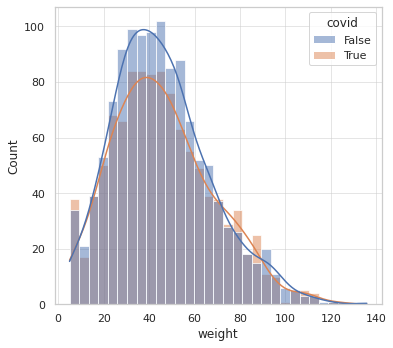

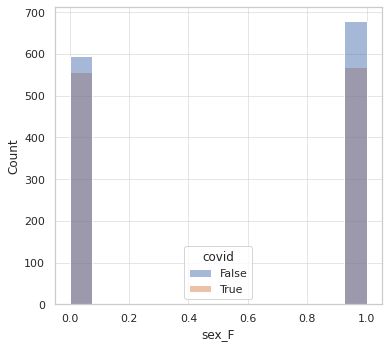

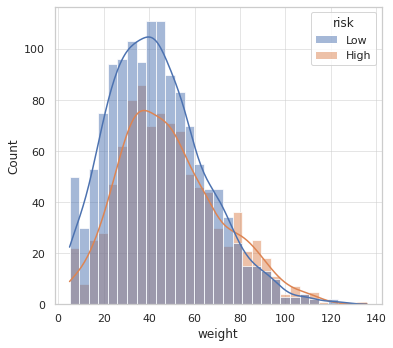

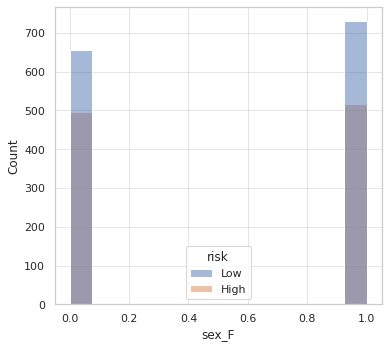

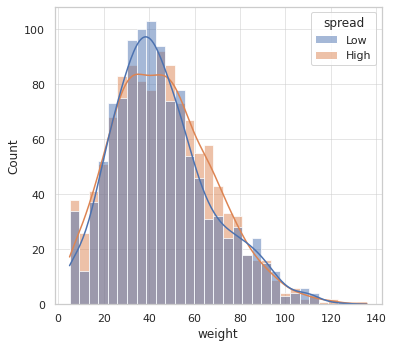

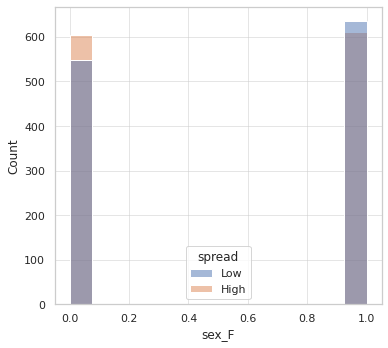

In [109]:
ALL_COLS_NAMES = ['sex_F']

CONTINUOUS_AND_ORDINAL = ['weight']
COLS = 3
ROWS = int(np.ceil(len(ALL_COLS_NAMES) / COLS))

TARGET_FEATURES = ['covid', 'risk', 'spread']

for feature in TARGET_FEATURES:
  plt.figure(figsize=(15, 5 * ROWS))
  for i, column in enumerate(CONTINUOUS_AND_ORDINAL, 1):
    plt.subplot(ROWS,COLS,i)
    sns.histplot(data=train, x=column, hue=feature, kde=True)
    plt.grid(alpha=0.5)
    plt.tight_layout()

  plt.figure(figsize=(15, 5 * ROWS))
  for i, column in enumerate(ALL_COLS_NAMES, 1):
    if column in CONTINUOUS_AND_ORDINAL:
      continue
    plt.subplot(ROWS,COLS,i)
    sns.histplot(data=train, x=column, hue=feature, kde=False)
    plt.grid(alpha=0.5)
    plt.tight_layout()

#checking the ages of people with job:

In [110]:
#result: all the workers are above 16 years old, conributes to the reliability of age column
jobs_ages = []
   
for idx in range(len(train['employed'])):
  if train['employed'].iloc[idx]:
    if not pd.isna(train['age'].iloc[idx]): 
      jobs_ages.append(train['age'].iloc[idx])
all_above_16 = all(age >= 16 for age in jobs_ages)
print(all_above_16)


True


#**Q11:**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


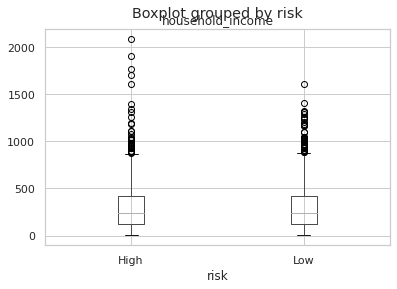

In [111]:
train.boxplot(by='risk', column='household_income')

**Answer:** It seems that the outliers do not tend to one specific risk level over another. So we could just ignore the outliers by refilling them with the value NaN and later on fill in this value with the median or any other technique.  

#**Cleaning Outliers - Boxplots**

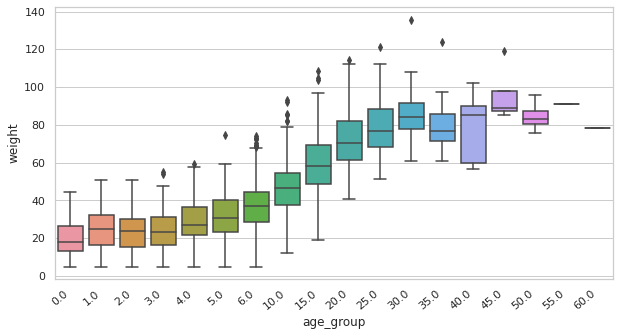

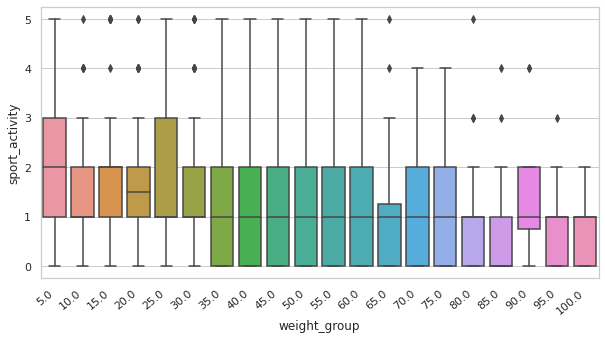

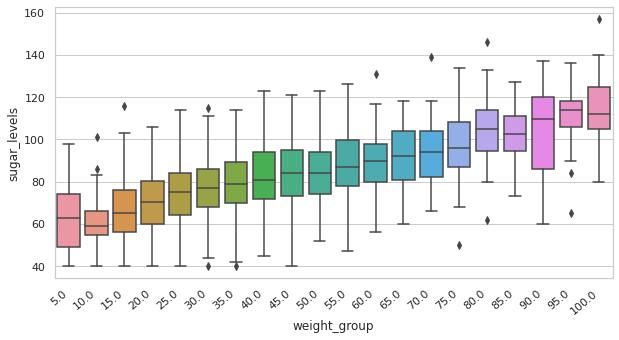

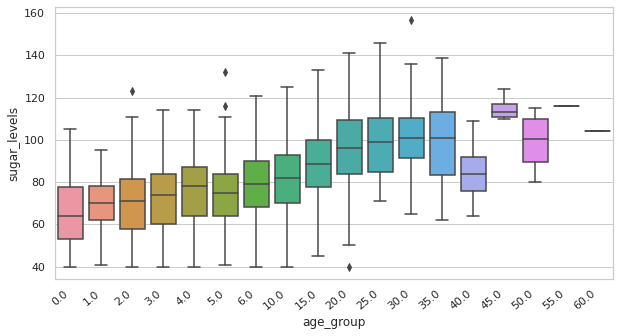

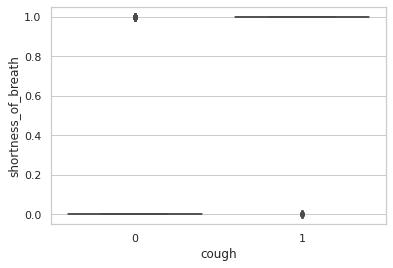

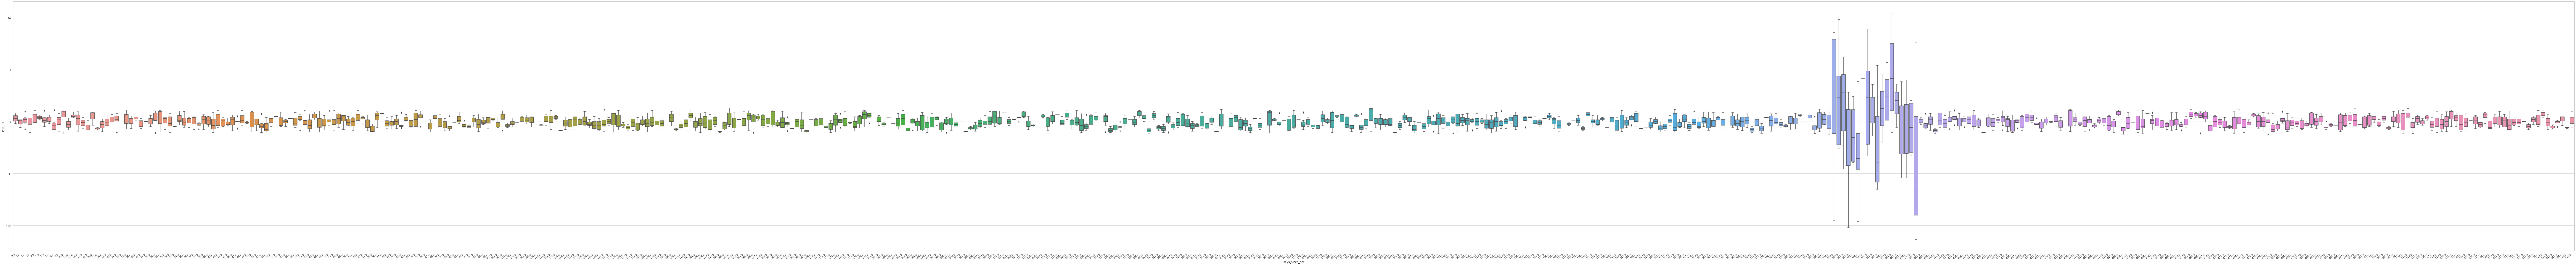

In [112]:
# CREATING NEW 'AGE_GROUP' and 'WEIGHT_GROUP' FEATURES 
train.loc[train['age']==0, 'age_group'] = 0
train.loc[train['age']==1, 'age_group'] = 1
train.loc[train['age']==2, 'age_group'] = 2
train.loc[train['age']==3, 'age_group'] = 3
train.loc[train['age']==4, 'age_group'] = 4
train.loc[train['age']==5, 'age_group'] = 5
train.loc[train['age'].between(6,9), 'age_group'] = 6
train.loc[train['age'].between(10,14), 'age_group'] = 10
train.loc[train['age'].between(15,19), 'age_group'] = 15
train.loc[train['age'].between(20,24), 'age_group'] = 20
train.loc[train['age'].between(25,29), 'age_group'] = 25
train.loc[train['age'].between(30,34), 'age_group'] = 30
train.loc[train['age'].between(35,39), 'age_group'] = 35
train.loc[train['age'].between(40,44), 'age_group'] = 40
train.loc[train['age'].between(45,49), 'age_group'] = 45
train.loc[train['age'].between(50,54), 'age_group'] = 50
train.loc[train['age'].between(55,59), 'age_group'] = 55
train.loc[train['age'].between(60,64), 'age_group'] = 60

train.loc[train['weight'].between(0,4), 'weight_group'] = 0
train.loc[train['weight'].between(5,9), 'weight_group'] = 5
train.loc[train['weight'].between(10,14), 'weight_group'] = 10
train.loc[train['weight'].between(15,19), 'weight_group'] = 15
train.loc[train['weight'].between(20,24), 'weight_group'] = 20
train.loc[train['weight'].between(25,29), 'weight_group'] = 25
train.loc[train['weight'].between(30,34), 'weight_group'] = 30
train.loc[train['weight'].between(35,39), 'weight_group'] = 35
train.loc[train['weight'].between(40,44), 'weight_group'] = 40
train.loc[train['weight'].between(45,49), 'weight_group'] = 45
train.loc[train['weight'].between(50,54), 'weight_group'] = 50
train.loc[train['weight'].between(55,59), 'weight_group'] = 55
train.loc[train['weight'].between(60,64), 'weight_group'] = 60
train.loc[train['weight'].between(65,69), 'weight_group'] = 65
train.loc[train['weight'].between(70,74), 'weight_group'] = 70
train.loc[train['weight'].between(75,79), 'weight_group'] = 75
train.loc[train['weight'].between(80,84), 'weight_group'] = 80
train.loc[train['weight'].between(85,89), 'weight_group'] = 85
train.loc[train['weight'].between(90,94), 'weight_group'] = 90
train.loc[train['weight'].between(95,99), 'weight_group'] = 95
train.loc[train['weight']>=100, 'weight_group'] = 100


# PLOTTING SOME BOXPLOTS TO HELP US FIND CONTEXTUAL OUTLIERS

plt.figure(figsize=(10,5))
a = sns.boxplot(data=train, x='age_group', y='weight')
a.set_xticklabels(a.get_xticklabels(), rotation=40, ha="right")
plt.show()

plt.figure(figsize=(10,5))
b = sns.boxplot(data=train, x='weight_group', y='sport_activity')
b.set_xticklabels(b.get_xticklabels(), rotation=40, ha="right")
plt.show()

plt.figure(figsize=(10,5))
c = sns.boxplot(data=train, x='weight_group', y='sugar_levels')
c.set_xticklabels(c.get_xticklabels(), rotation=40, ha="right")
plt.show()

plt.figure(figsize=(10,5))
d = sns.boxplot(data=train, x='age_group', y='sugar_levels')
d.set_xticklabels(d.get_xticklabels(), rotation=40, ha="right")
plt.show()

e = sns.boxplot(data=train, x='cough', y='shortness_of_breath')
plt.show()

plt.figure(figsize=(200,20))
f = sns.boxplot(data=train, x='days_since_pcr', y='PCR_01')
f.set_xticklabels(f.get_xticklabels(), rotation=40, ha='right')
plt.show()

del train['age_group'] # we added these features just to help with the boxplot
del train['weight_group']

# plt.figure(figsize=(200,20))
# f = sns.boxplot(data=train, x='days_since_pcr', y='PCR_02')
# f.set_xticklabels(f.get_xticklabels(), rotation=40, ha='right')
# plt.show()

# plt.figure(figsize=(200,20))
# f = sns.boxplot(data=train, x='days_since_pcr', y='PCR_03')
# f.set_xticklabels(f.get_xticklabels(), rotation=40, ha='right')
# plt.show()

# plt.figure(figsize=(200,20))
# f = sns.boxplot(data=train, x='days_since_pcr', y='PCR_04')
# f.set_xticklabels(f.get_xticklabels(), rotation=40, ha='right')
# plt.show()

# plt.figure(figsize=(200,20))
# f = sns.boxplot(data=train, x='days_since_pcr', y='PCR_05')
# f.set_xticklabels(f.get_xticklabels(), rotation=40, ha='right')
# plt.show()

# plt.figure(figsize=(200,20))
# f = sns.boxplot(data=train, x='days_since_pcr', y='PCR_06')
# f.set_xticklabels(f.get_xticklabels(), rotation=40, ha='right')
# plt.show()

# plt.figure(figsize=(200,20))
# f = sns.boxplot(data=train, x='days_since_pcr', y='PCR_07')
# f.set_xticklabels(f.get_xticklabels(), rotation=40, ha='right')
# plt.show()

# plt.figure(figsize=(200,20))
# f = sns.boxplot(data=train, x='days_since_pcr', y='PCR_08')
# f.set_xticklabels(f.get_xticklabels(), rotation=40, ha='right')
# plt.show()

# plt.figure(figsize=(200,20))
# f = sns.boxplot(data=train, x='days_since_pcr', y='PCR_09')
# f.set_xticklabels(f.get_xticklabels(), rotation=40, ha='right')
# plt.show()

# plt.figure(figsize=(200,20))
# f = sns.boxplot(data=train, x='days_since_pcr', y='PCR_10')
# f.set_xticklabels(f.get_xticklabels(), rotation=40, ha='right')
# plt.show()


# ** לפני חריגות -אחד אחד ** 

In [113]:
# plt.figure(figsize=(15,5))
# a = sns.boxplot(data=train, x='age', y='weight')
# a.set_xticklabels(a.get_xticklabels(), rotation=40, ha="right")
# plt.show()

# plt.figure(figsize=(30,5))
# a = sns.boxplot(data=train, x='weight', y='sugar_levels')
# a.set_xticklabels(a.get_xticklabels(), rotation=40, ha="right")
# plt.show()

#Nir - regular outliers cleaning, by IQR based technique:

In [114]:
#here all the not smart cleaning (unlike weight, sugar_levels for example):
# coordinates, days_since_pcr, num_of_siblings, conversations_per_day, happiness_score, sport_activity, household_income, PCR_checks

#mean imputation instead
features_to_clean = ['current_location_x_coordinate','current_location_y_coordinate', 'days_since_pcr' , 'num_of_siblings', 'household_income',
                     'conversations_per_day', 'happiness_score', 'sport_activity', 'age'
                     ,'PCR_01', 'PCR_02', 'PCR_03', 'PCR_04', 'PCR_05',  'PCR_06', 'PCR_07', 'PCR_08',  'PCR_09', 'PCR_10']
#boxplots before:

# train.boxplot(column = features_to_clean, widths=(1)*len(features_to_clean))
# train.boxplot(column = 'PCR_03')

#execution:
for feature in features_to_clean:
#if all(isinstance(e, (int, float)) for e in train[feature]) and any(x > 1 for x in train[feature]):
  Q1 = train[feature].quantile(0.25)
  Q3 = train[feature].quantile(0.75)
  IQR = Q3 - Q1
  mean = train[feature].mean()
  for idx in range(len(train[feature])):
    if (train[feature].iloc[idx] < (Q1 - 1.5 * IQR)) or (train[feature].iloc[idx] > (Q3 + 1.5 * IQR)):
      train[feature].iloc[idx] = mean
      if feature == 'age':
        train[feature].iloc[idx] = Q3 + 1.5*IQR

#boxplots after:
print('\n\n')
# train.boxplot(column = features_to_clean, widths=(1)*len(features_to_clean))
# train.boxplot(column = 'PCR_03')


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


#Nir - smart cleaning of outliers - weights by age:

In [115]:
#we so a strong linear connection between weight to sugar level and between age to weight (atleast in the beginning)
#so, we will impute the values of weight through age, and of sugar-level through weight.

#weights by age:
#taking every missing weight, look at the IQR limits of +- x years from its age. if it's to much we will put the mean 
def calculate_weight_IQR_limits_by_age(age):
  weights=[]
  for idx in range(len(train['age'])):
    if not(math.isnan(train['age'].iloc[idx])) and not(math.isnan(train['weight'].iloc[idx])):
      if train['age'].iloc[idx]<50:
        diff = 0
      else:
        diff = 11
      if abs((train['age'].iloc[idx]) - age) <= diff :
          weights.append(train['weight'].iloc[idx])
  if weights == []:
    general_mean = train['weight'].mean()
    return general_mean, general_mean, general_mean
  weights_df = pd.DataFrame(weights)
  Q1 = weights_df[0].quantile(0.25)
  Q3 = weights_df[0].quantile(0.75)
  Q2 = weights_df[0].quantile(0.5)
  IQR = Q3 - Q1
  return Q1 - 1.5 * IQR, Q3 + 1.5 * IQR, Q2
#fixing weights:
array_of_low_limit_high_limit_Q2_from_age_1_to_60 = []
for i in range(0,61):
  array_of_low_limit_high_limit_Q2_from_age_1_to_60.append([0.0,0.0,0.0])
for age in range(0,61):
  array_of_low_limit_high_limit_Q2_from_age_1_to_60[age] = calculate_weight_IQR_limits_by_age(age)
mean_general = train['weight'].mean()
upper_general_limit =  train['weight'].quantile(0.75) + 1.5*(train['weight'].quantile(0.75)-train['weight'].quantile(0.25))
for idx in range(len(train['patient_id'])):
  if not math.isnan(train['weight'].iloc[idx]):
    if not(math.isnan(train['age'].iloc[idx])): #if age exist
      if  60 < train['age'].iloc[idx]:
        train['weight'].iloc[idx] = mean_general
      low_limit, high_limit, Q2 = array_of_low_limit_high_limit_Q2_from_age_1_to_60[int(train['age'].iloc[idx])]
      if  high_limit < train['weight'].iloc[idx]:
        train['weight'].iloc[idx] = Q2
    else:
      if upper_general_limit<train['weight'].iloc[idx]:
        train['weight'].iloc[idx] = mean_general





/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


#Nir - smart cleaning of outliers - sugar_level by weight:

In [116]:
#sugar levels by weight:
def calculate_sugar_levels_IQR_limits_by_weight(weight):
  sugar_levels_list=[]
  for idx in range(len(train['sugar_levels'])):
    if not(math.isnan(train['sugar_levels'].iloc[idx])) and not(math.isnan(train['weight'].iloc[idx])):
      if train['weight'].iloc[idx] <= 100 and 5 <= train['weight'].iloc[idx]:
        diff = 5
      else:
        diff = 20
      if abs((train['weight'].iloc[idx]) - weight) <= diff :
        sugar_levels_list.append(train['sugar_levels'].iloc[idx])
  if sugar_levels_list == []:
    general_mean = train['sugar_levels'].mean()
    return general_mean, general_mean, general_mean
  sugar_levels_df = pd.DataFrame(sugar_levels_list)
  Q1 = sugar_levels_df[0].quantile(0.25)
  Q3 = sugar_levels_df[0].quantile(0.75)
  Q2 = sugar_levels_df[0].quantile(0.5)
  IQR = Q3 - Q1
  return Q1 - 1.5 * IQR, Q3 + 1.5 * IQR, Q2

# print(calculate_sugar_levels_IQR_limits_by_weight)
#fixing sugar_levels:
array_of_low_limit_high_limit_Q2_from_weight_1_to_140 = []
for i in range(1,142):
  array_of_low_limit_high_limit_Q2_from_weight_1_to_140.append([0.0,0.0,0.0])
for weight in range(1,141):
  array_of_low_limit_high_limit_Q2_from_weight_1_to_140[weight] = calculate_sugar_levels_IQR_limits_by_weight(weight)
mean_general = train['sugar_levels'].mean()
upper_general_limit =  train['sugar_levels'].quantile(0.75) + 1.5*(train['sugar_levels'].quantile(0.75)-train['sugar_levels'].quantile(0.25))
for idx in range(len(train['patient_id'])):
  if not math.isnan(train['sugar_levels'].iloc[idx]):
    if not(math.isnan(train['weight'].iloc[idx])): #if weight exist
      if 140 < train['weight'].iloc[idx]:
        train['sugar_levels'].iloc[idx] = mean_general
      low_limit, high_limit, Q2 = array_of_low_limit_high_limit_Q2_from_weight_1_to_140[int(train['weight'].iloc[idx])]
      if  high_limit < train['sugar_levels'].iloc[idx]:
        train['sugar_levels'].iloc[idx] = Q2
    else:
      if upper_general_limit<train['sugar_levels'].iloc[idx]:
        train['sugar_levels'].iloc[idx] = mean_general



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


#cleaning outliers diagrams - duplication:

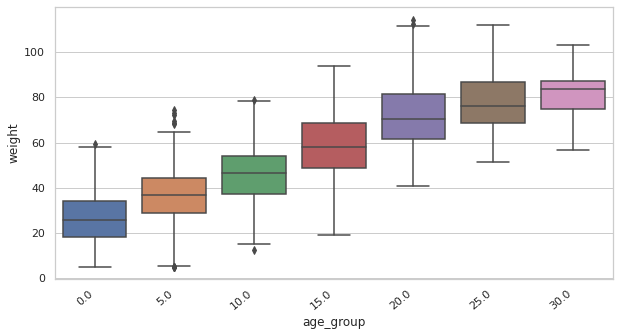

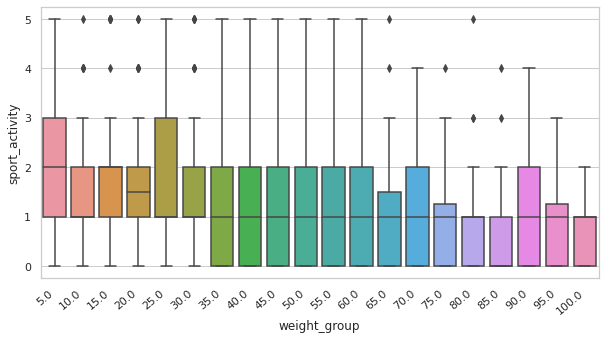

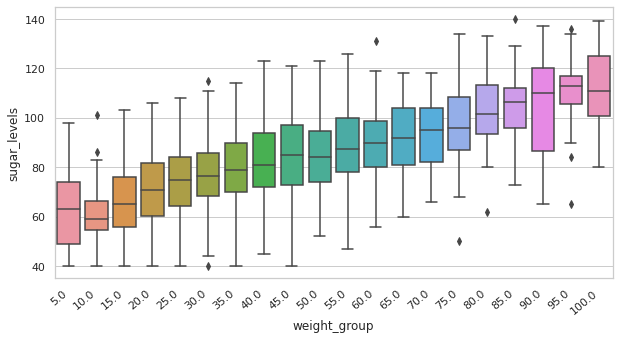

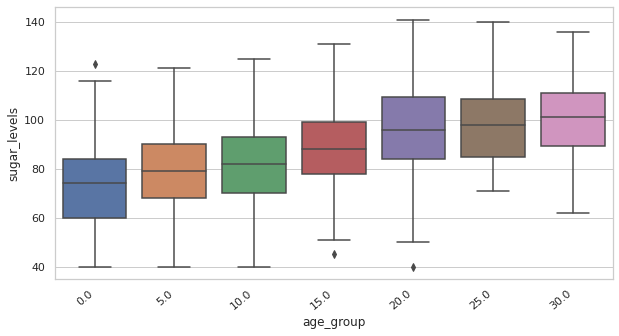

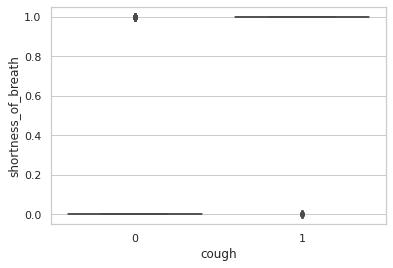

In [118]:
# CREATING NEW 'AGE_GROUP' and 'WEIGHT_GROUP' FEATURES 
# train.loc[train['age']==0, 'age_group'] = 0
# train.loc[train['age']==1, 'age_group'] = 1
# train.loc[train['age']==2, 'age_group'] = 2
# train.loc[train['age']==3, 'age_group'] = 3
# train.loc[train['age']==4, 'age_group'] = 4
# train.loc[train['age']==5, 'age_group'] = 5
train.loc[train['age'].between(0,5), 'age_group'] = 0
train.loc[train['age'].between(6,9), 'age_group'] = 5
train.loc[train['age'].between(10,14), 'age_group'] = 10
train.loc[train['age'].between(15,19), 'age_group'] = 15
train.loc[train['age'].between(20,24), 'age_group'] = 20
train.loc[train['age'].between(25,29), 'age_group'] = 25
train.loc[train['age'].between(30,34), 'age_group'] = 30
train.loc[train['age'].between(35,39), 'age_group'] = 35
train.loc[train['age'].between(40,44), 'age_group'] = 40
train.loc[train['age'].between(45,49), 'age_group'] = 45
train.loc[train['age'].between(50,54), 'age_group'] = 50
train.loc[train['age'].between(55,59), 'age_group'] = 55
train.loc[train['age'].between(60,64), 'age_group'] = 60

train.loc[train['weight'].between(0,4), 'weight_group'] = 0
train.loc[train['weight'].between(5,9), 'weight_group'] = 5
train.loc[train['weight'].between(10,14), 'weight_group'] = 10
train.loc[train['weight'].between(15,19), 'weight_group'] = 15
train.loc[train['weight'].between(20,24), 'weight_group'] = 20
train.loc[train['weight'].between(25,29), 'weight_group'] = 25
train.loc[train['weight'].between(30,34), 'weight_group'] = 30
train.loc[train['weight'].between(35,39), 'weight_group'] = 35
train.loc[train['weight'].between(40,44), 'weight_group'] = 40
train.loc[train['weight'].between(45,49), 'weight_group'] = 45
train.loc[train['weight'].between(50,54), 'weight_group'] = 50
train.loc[train['weight'].between(55,59), 'weight_group'] = 55
train.loc[train['weight'].between(60,64), 'weight_group'] = 60
train.loc[train['weight'].between(65,69), 'weight_group'] = 65
train.loc[train['weight'].between(70,74), 'weight_group'] = 70
train.loc[train['weight'].between(75,79), 'weight_group'] = 75
train.loc[train['weight'].between(80,84), 'weight_group'] = 80
train.loc[train['weight'].between(85,89), 'weight_group'] = 85
train.loc[train['weight'].between(90,94), 'weight_group'] = 90
train.loc[train['weight'].between(95,99), 'weight_group'] = 95
train.loc[train['weight']>=100, 'weight_group'] = 100


# PLOTTING SOME BOXPLOTS TO HELP US FIND CONTEXTUAL OUTLIERS

plt.figure(figsize=(10,5))
a = sns.boxplot(data=train, x='age_group', y='weight')
a.set_xticklabels(a.get_xticklabels(), rotation=40, ha="right")
plt.show()

plt.figure(figsize=(10,5))
b = sns.boxplot(data=train, x='weight_group', y='sport_activity')
b.set_xticklabels(b.get_xticklabels(), rotation=40, ha="right")
plt.show()

plt.figure(figsize=(10,5))
c = sns.boxplot(data=train, x='weight_group', y='sugar_levels')
c.set_xticklabels(c.get_xticklabels(), rotation=40, ha="right")
plt.show()

plt.figure(figsize=(10,5))
d = sns.boxplot(data=train, x='age_group', y='sugar_levels')
d.set_xticklabels(d.get_xticklabels(), rotation=40, ha="right")
plt.show()

e = sns.boxplot(data=train, x='cough', y='shortness_of_breath')
plt.show()

del train['age_group'] # we added these features just to help with the boxplot
del train['weight_group']



In [119]:
# CLEANING OUTLIERS FROM PCR TESTS:

PCR_TESTS = ['PCR_01', 'PCR_02', 'PCR_03', 'PCR_04', 'PCR_05', 'PCR_06', 'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10']

for pcr_test in PCR_TESTS:
  for patient in range(len(train[pcr_test])):
    if train['days_since_pcr'].iloc[patient] >= 389 and train['days_since_pcr'].iloc[patient] <= 407:
      train[pcr_test].iloc[patient] = float('NaN')


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


#**Q16:**


In [120]:
# print(train['num_of_siblings'].isna().sum()/30) # 'Nan' value percentage
train['num_of_siblings'] = train.num_of_siblings.fillna(train.num_of_siblings.median())


#IMPUTING ALL MISSING VALUES

# all the regular imputations (random / by mean):

In [121]:
#here all the not smart imputations (unlike weight, sugar_levels for example):
# coordinates, days_since_pcr, num_of_siblings, conversations_per_day, happiness_score, sport_activity, household_income, PCR_checks

#mean imputation instead
features_to_impute = ['current_location_x_coordinate','current_location_y_coordinate', 'days_since_pcr' , 'num_of_siblings', 'household_income',
                     'conversations_per_day', 'happiness_score', 'sport_activity',
                     'PCR_01', 'PCR_02', 'PCR_03', 'PCR_04','PCR_05', 'PCR_06', 'PCR_07','PCR_08', 'PCR_09', 'PCR_10'
                     ]
# print((train['PCR_01']).isna().sum())                     
for feature in features_to_impute:
  mean = train[feature].mean()
  for idx in range(len(train[feature])):
    if math.isnan(train[feature].iloc[idx]):
      train[feature].iloc[idx] = mean
# print(train['PCR_01'].isna().sum())                     


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


#Complete the missing sex through weight

In [122]:
# print(sum(train['sex_M']))
# print(sum(train['sex_F']))

def calculate_average_weight_by_sex_and_age(sex, age):
  sum_of_weights = 0
  num_of_weights = 0
  for idx in range(len(train[sex])):
    if not (math.isnan(train[sex].iloc[idx])) and not(math.isnan(train['age'].iloc[idx])) and not(math.isnan(train['weight'].iloc[idx])):
      if train[sex].iloc[idx] == 1 and abs((train['age'].iloc[idx]) - age) <= 2 :
            sum_of_weights+=train['weight'].iloc[idx]
            num_of_weights+=1
  #print(num_of_weights)
  if num_of_weights != 0:
    return sum_of_weights/num_of_weights
  return 0

def choose_M_or_F_by_weight_and_age(weight, age):
  female_average_in_this_age = calculate_average_weight_by_sex_and_age('sex_F', age)
  male_average_in_this_age = calculate_average_weight_by_sex_and_age('sex_M', age)
  diff_from_female = abs(female_average_in_this_age - weight)
  diff_from_male = abs(male_average_in_this_age - weight)
  #print(diff_from_female, diff_from_male)
  # diff_from_female = 0.95*diff_from_female 
  # diff_from_male = 1.05*diff_from_male
  if diff_from_female < diff_from_male:
    return 'sex_F'
  else:
    return 'sex_M'

def get_55_percents_female():
  return np.random.choice(['sex_F', 'sex_M'], p=[0.55, 0.45])

print(sum(train['sex_M']))
print(sum(train['sex_F']))

for idx in range(len(train['patient_id'])):
  if train['sex_F'].iloc[idx] == 0 and train['sex_M'].iloc[idx] == 0:
    if  not(math.isnan(train['age'].iloc[idx])) and not(math.isnan(train['weight'].iloc[idx])):
      # print(choose_M_or_F_by_weight_and_age(train['weight'].iloc[idx], train['age'].iloc[idx]))
      train[choose_M_or_F_by_weight_and_age(train['weight'].iloc[idx], train['age'].iloc[idx])].iloc[idx] = 1
    else:
      #print(get_55_percents_female())
      train[get_55_percents_female()].iloc[idx] = 1

print(sum(train['sex_M']))
print(sum(train['sex_F']))



#work_plan:
# after deleting the outliers of weight, for every missing sex:
# we will take the average weight of male and of female in this age
# check if the missing one is closer to the female-weight or to male-weight
#take in consederation - there are more woman, so give a little advatage to female
#if there is no weight or age - random with 55% woman

1018
1247


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


1089
1311


#smart imputations of features

In [123]:
#we so a strong linear connection between weight to sugar level and between age to weight (atleast in the beginning)
#so, we will impute the values of weight through age, and of sugar-level through weight.
#it's more percise than the general one

#weight by age (and sex):
for idx in range(len(train['patient_id'])):
  if math.isnan(train['weight'].iloc[idx]):
    sex = 'sex_F'
    if train['sex_M'].iloc[idx] == 1:
      sex = 'sex_M'
    if  not(math.isnan(train['age'].iloc[idx])):
      train['weight'].iloc[idx] = calculate_average_weight_by_sex_and_age(sex, train['age'].iloc[idx])
    else:
      train['weight'].iloc[idx] = train['weight'].mean()

#sugar_levels_by_weight:
for idx in range(len(train['patient_id'])):
  if math.isnan(train['sugar_levels'].iloc[idx]):
    x,y,Q2 = calculate_sugar_levels_IQR_limits_by_weight(train['weight'].iloc[idx])
    train['sugar_levels'].iloc[idx] = Q2

#age by weight:
def calculate_average_age_by_weight(weight):
  list_of_ages = []
  for idx in range(len(train['patient_id'])):
    if  not(math.isnan(train['age'].iloc[idx])) and not(math.isnan(train['weight'].iloc[idx])):
      if abs((train['weight'].iloc[idx]) - weight) <= 5 :
            list_of_ages.append(train['age'].iloc[idx])
  if list_of_ages == []:
    return train['age'].mean()
  return sum(list_of_ages) / len(list_of_ages)

for idx in range(len(train['patient_id'])):
  if math.isnan(train['age'].iloc[idx]):
    train['age'].iloc[idx] = calculate_average_age_by_weight(train['weight'].iloc[idx])
    
# #imputing pcr_08 by pcr_09
# def calculate_pcr_08_by_pcr_09(PCR_09):
#   for idx in range(len(train['patient_id'])):
#     if not(math.isnan(train['PCR_09'].iloc[idx])):
#       perc = (train['PCR_09'].iloc[idx] - min(train['PCR_09']) ) / ( max(train['PCR_09']) - min(train['PCR_09']) ) 
#       train['PCR_08'].iloc[idx] = (1-perc) * (max(train['PCR_08']))
#     else:
#       train['PCR_08'].iloc[idx] = train['PCR_08'].mean()

# for idx in range(len(train['patient_id'])):
#   if math.isnan(train['PCR_08'].iloc[idx]):
#     train['PCR_08'].iloc[idx] = calculate_pcr_05_by_pcr_06(train['PCR_09'].iloc[idx])     
# #imputing pcr_05 by pcr_06
# def calculate_pcr_05_by_pcr_06(PCR_06):
#   for idx in range(len(train['patient_id'])):
#     if not(math.isnan(train['PCR_06'].iloc[idx])):
#       perc = (train['PCR_06'].iloc[idx] - min(train['PCR_06']) ) / ( max(train['PCR_06']) - min(train['PCR_06']) ) 
#       train['PCR_05'].iloc[idx] =  perc * (max(train['PCR_05']))
#     else:
#       train['PCR_05'].iloc[idx] = train['PCR_05'].mean()

# for idx in range(len(train['patient_id'])):
#   if math.isnan(train['PCR_05'].iloc[idx]):
#     train['PCR_05'].iloc[idx] = calculate_pcr_05_by_pcr_06(train['PCR_06'].iloc[idx])      


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


#**Q17:**

דיאגרמות של מין ומשקל אחרי השלמת הדאטה:

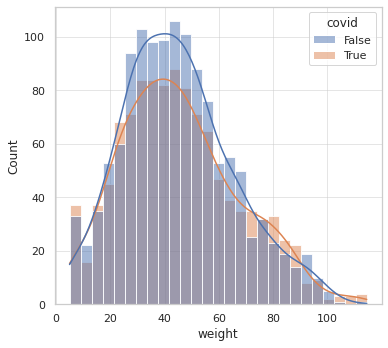

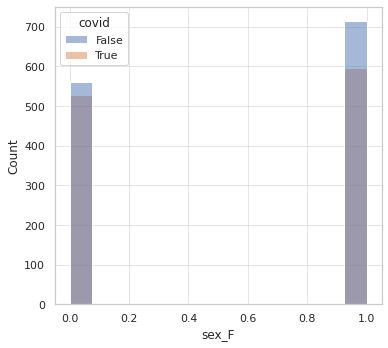

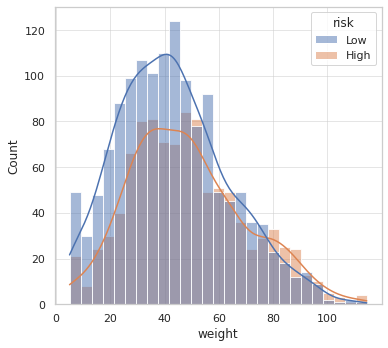

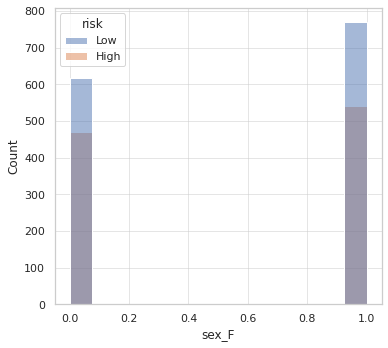

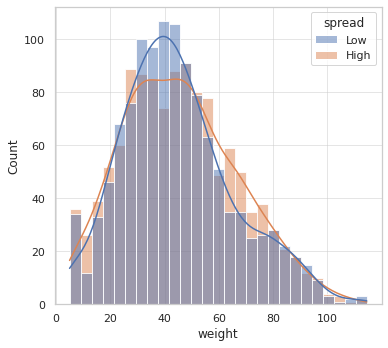

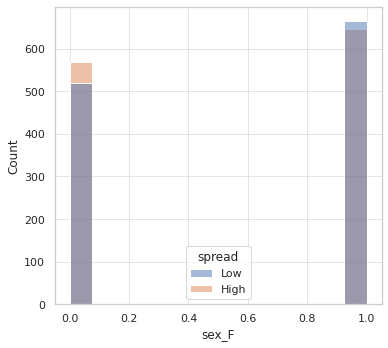

In [124]:
ALL_COLS_NAMES = ['sex_F']

CONTINUOUS_AND_ORDINAL = ['weight']
COLS = 3
ROWS = int(np.ceil(len(ALL_COLS_NAMES) / COLS))

TARGET_FEATURES = ['covid', 'risk', 'spread']

for feature in TARGET_FEATURES:
  plt.figure(figsize=(15, 5 * ROWS))
  for i, column in enumerate(CONTINUOUS_AND_ORDINAL, 1):
    plt.subplot(ROWS,COLS,i)
    sns.histplot(data=train, x=column, hue=feature, kde=True)
    plt.grid(alpha=0.5)
    plt.tight_layout()

  plt.figure(figsize=(15, 5 * ROWS))
  for i, column in enumerate(ALL_COLS_NAMES, 1):
    if column in CONTINUOUS_AND_ORDINAL:
      continue
    plt.subplot(ROWS,COLS,i)
    sns.histplot(data=train, x=column, hue=feature, kde=False)
    plt.grid(alpha=0.5)
    plt.tight_layout()

#changing the data to 0,1


In [125]:
# for idx in range(len(train['risk'])):
#   if train['risk'][idx] == 'High':
#     train['risk'][idx] = float(1)
#   if train['risk'][idx] == 'Low':
#     train['risk'][idx] = float(0)
# for idx in range(len(train['spread'])):
#   if train['spread'][idx] == 'High':
#     train['spread'][idx] = float(1)
#   if train['spread'][idx] == 'Low':
#     train['spread'][idx] = float(0)
# for idx in range(len(train['covid'])):
#   if train['covid'][idx] == True:
#     train['covid'][idx] = float(1)
#   if train['covid'][idx] == False:
#     train['covid'][idx] = float(0)    

risk_b = [None]*len(train['patient_id'])
for idx in range(len(train['risk'])):
  if train['risk'].iloc[idx] == 'High':
    risk_b[idx] = float(1)
  if train['risk'].iloc[idx] == 'Low':
    risk_b[idx] = float(0)
train['risk'] = risk_b
# print(train['risk'])

spread_b = [None]*len(train['patient_id'])
for idx in range(len(train['spread'])):
  if train['spread'].iloc[idx] == 'High':
    spread_b[idx] = float(1)
  if train['spread'].iloc[idx] == 'Low':
    spread_b[idx] = float(0)
train['spread'] = spread_b
# print(train['spread'])



#Corr Mat - Q19


spread                          -0.220259
blood_type_O+                   -0.059648
PCR_09                          -0.031021
PCR_05                          -0.029006
PCR_06                          -0.028968
low_appetite                    -0.021355
PCR_01                          -0.011883
employed                        -0.008651
age                             -0.005628
sex_F                           -0.005334
blood_type_A-                   -0.004107
blood_type_AB+                  -0.004088
sport_activity                  -0.003763
PCR_02                          -0.003397
weight                          -0.003369
blood_type_O-                   -0.003223
PCR_03                           0.002227
blood_type_B-                    0.002511
PCR_07                           0.003352
happiness_score                  0.004567
sex_M                            0.005334
headache                         0.005928
fever                            0.006853
household_income                 0

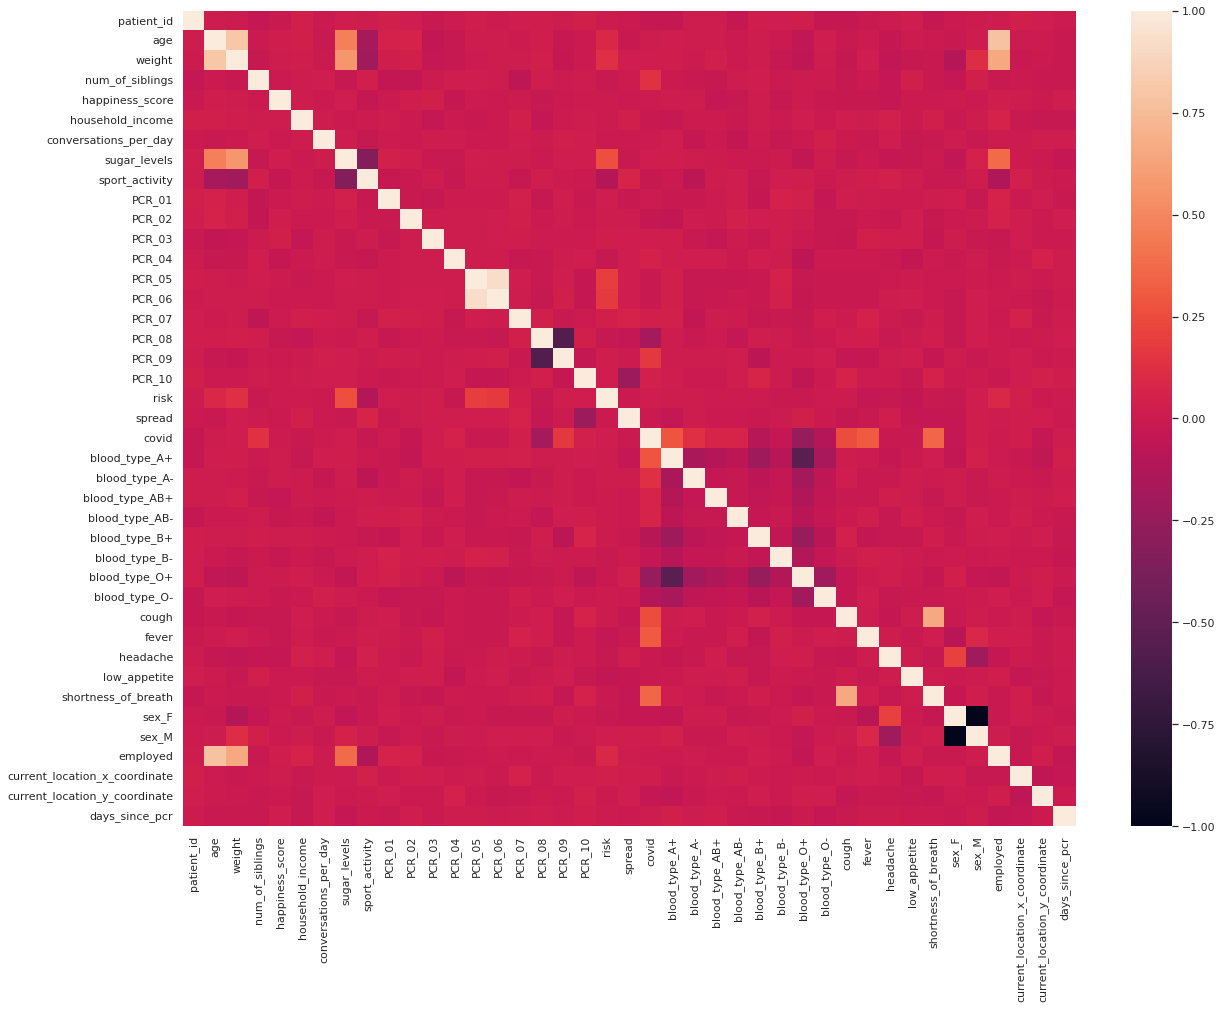

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train['days_since_pcr'] = le.fit_transform(train['days_since_pcr'])

def show_corr_mat():#plot of corr matrix:
  corr = train.corr()
  plt.subplots(figsize=(20,15))
  sns.heatmap(corr, 
              xticklabels=corr.columns.values,
              yticklabels=corr.columns.values)

def show_corr_of_specific_feature(feature_name):
  c = train.corr()
  print(c[feature_name].sort_values())
  print('\n \n')

def show_top_corrolations(): #not including between feature to itself
  print('\n \n')
  c = train.corr()
  upper_tri = c.where(np.triu(np.ones(c.shape),k=1).astype(np.bool))
  s = upper_tri.unstack()
  so = s.sort_values(kind="quicksort", ascending = True)
  print(so.head(10))
  print('\n \n')
  so = s.sort_values(kind="quicksort", ascending = False)
  print(so.head(40))

show_corr_of_specific_feature('PCR_10')

show_corr_of_specific_feature('risk')

show_top_corrolations()
show_corr_mat()



# Nir - Q21

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


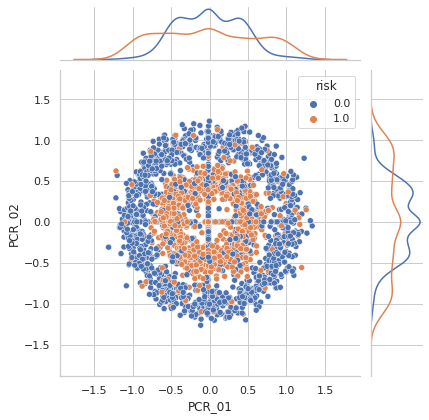

In [ ]:
grid = sns.JointGrid(x='PCR_01', y='PCR_02', data=train, height = 6)
g = grid.plot_joint(sns.scatterplot, hue='risk', data=train)
sns.kdeplot(train.loc[train['risk']==1, 'PCR_01'], ax=g.ax_marg_x, legend=False)
sns.kdeplot(train.loc[train['risk']==0, 'PCR_01'], ax=g.ax_marg_x, legend=False)
sns.kdeplot(train.loc[train['risk']==1, 'PCR_02'], ax=g.ax_marg_y, vertical=True, legend=False)
sns.kdeplot(train.loc[train['risk']==0, 'PCR_02'], ax=g.ax_marg_y, vertical=True, legend=False)



#**Removing features**

In [128]:
  del train['weight']
  del train['sex_M']
  del train['PCR_06']
  del train['PCR_09']
  del train['happiness_score']
  del train['sport_activity']
  del train['employed']

In [129]:
train.shape

(2400, 35)

#checking of missing data columns

In [ ]:
#see how common the missing data is:
for feature in train:
  print(feature, " ", train[feature].isna().sum() / 24)


patient_id   0.0
age   0.0
num_of_siblings   0.0
household_income   0.0
conversations_per_day   0.0
sugar_levels   0.0
PCR_01   0.0
PCR_02   0.0
PCR_03   0.0
PCR_04   0.0
PCR_05   0.0
PCR_07   0.0
PCR_08   0.0
PCR_10   0.0
risk   0.0
spread   0.0
covid   0.0
blood_type_A+   0.0
blood_type_A-   0.0
blood_type_AB+   0.0
blood_type_AB-   0.0
blood_type_B+   0.0
blood_type_B-   0.0
blood_type_O+   0.0
blood_type_O-   0.0
cough   0.0
fever   0.0
headache   0.0
low_appetite   0.0
shortness_of_breath   0.0
sex_F   0.0
state   5.083333333333333
current_location_x_coordinate   0.0
current_location_y_coordinate   0.0
days_since_pcr   0.0


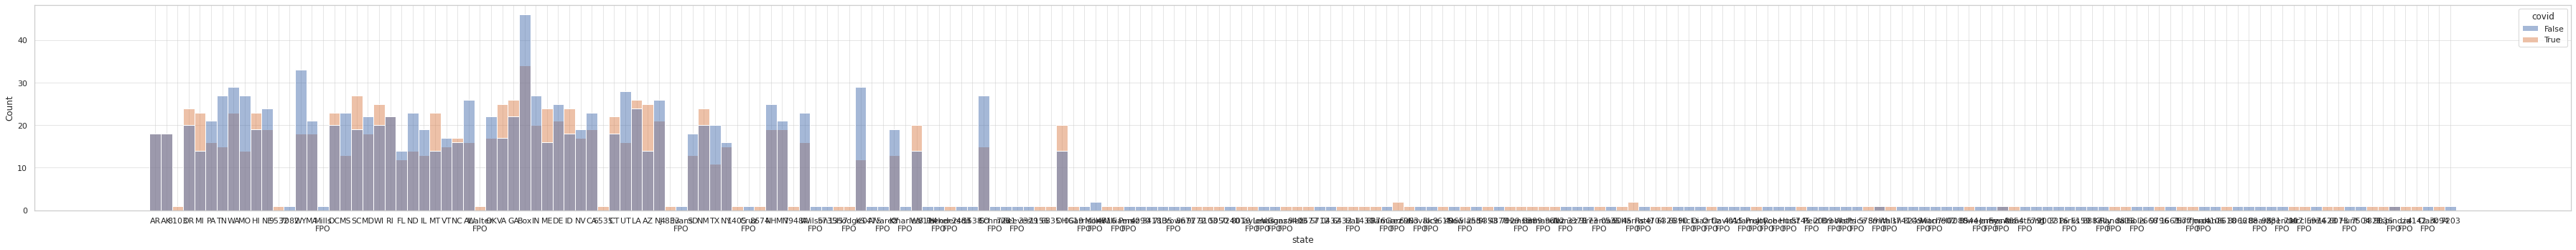

In [ ]:
# check if state feature is relevant

plt.figure(figsize=(50, 5 * ROWS))
sns.histplot(data=train, x='state', hue='covid', kde=False)
plt.grid(alpha=0.5)
plt.tight_layout()

# pcr connections

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1670: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1670: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1670: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume

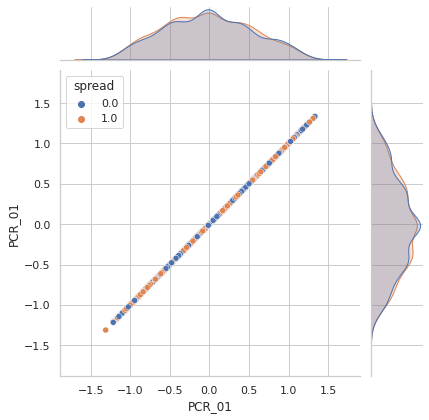

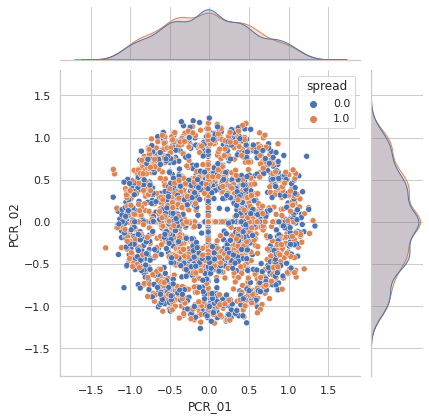

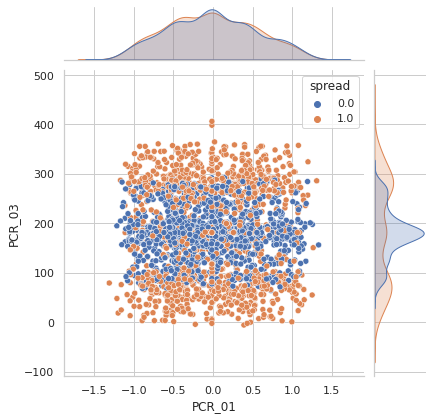

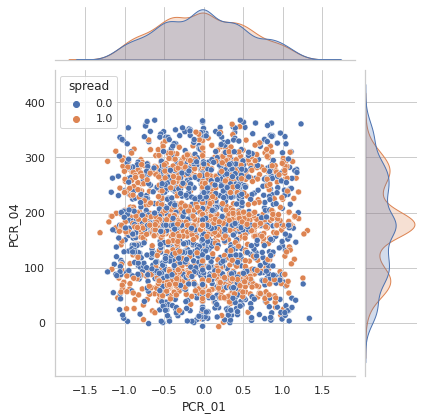

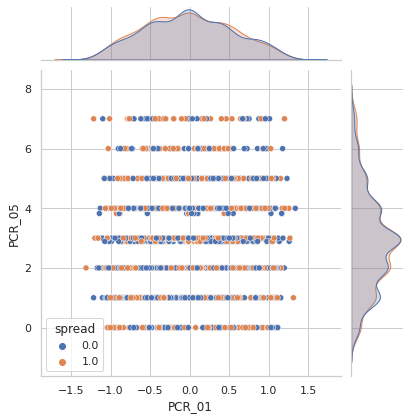

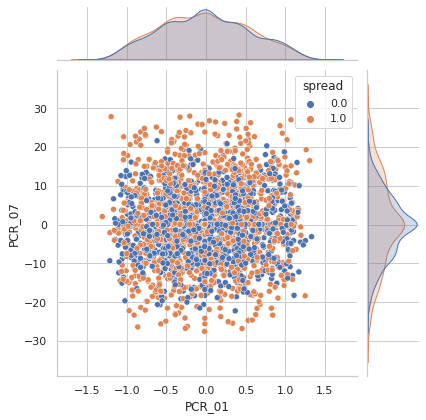

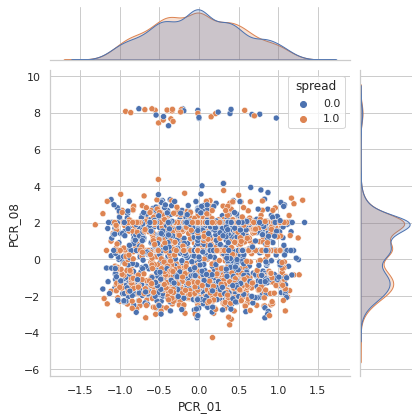

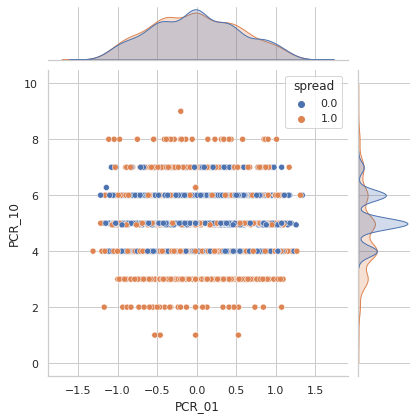

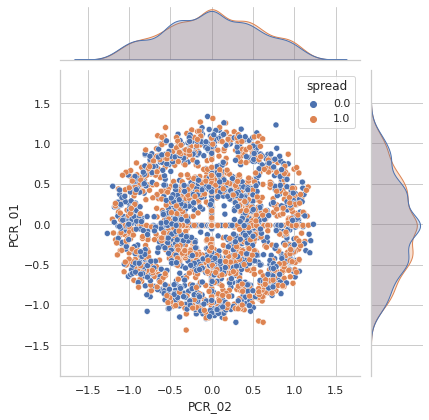

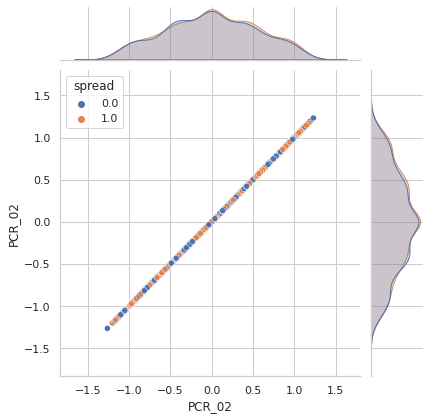

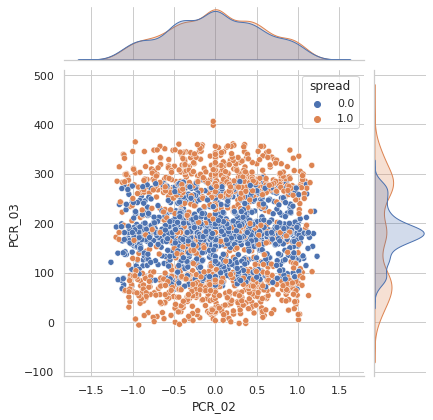

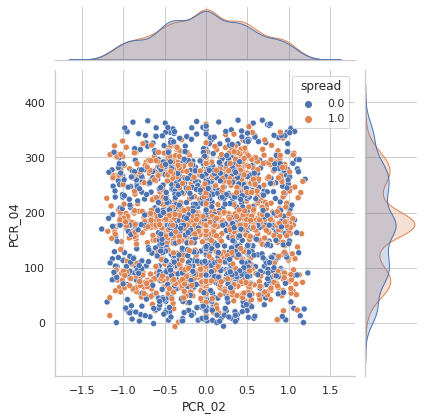

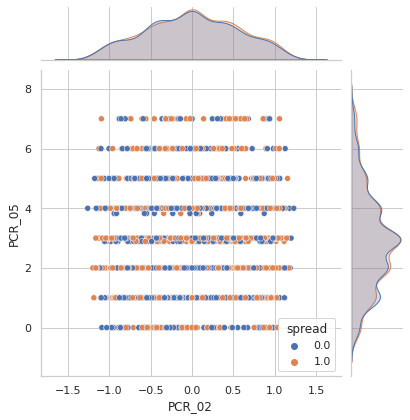

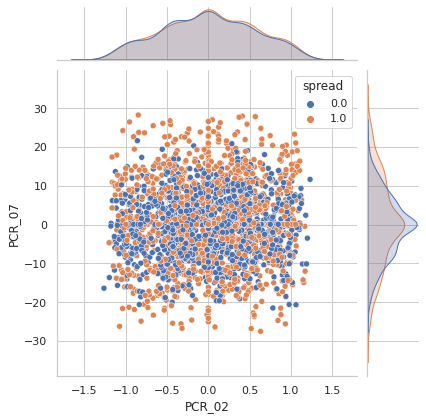

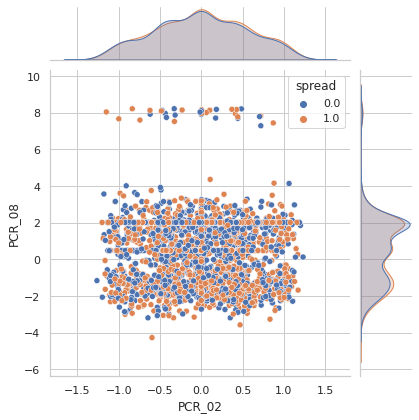

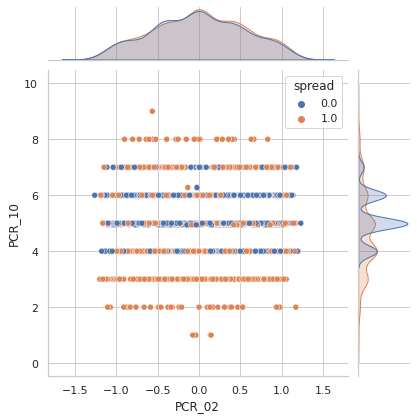

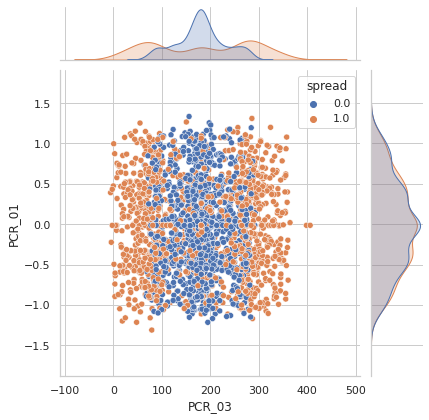

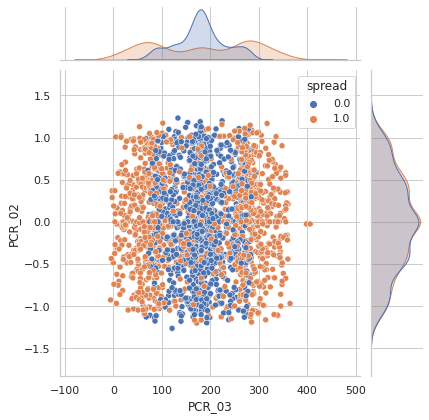

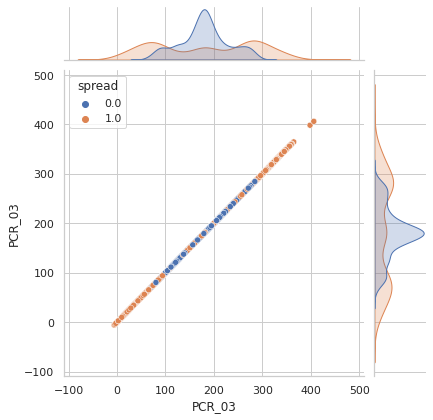

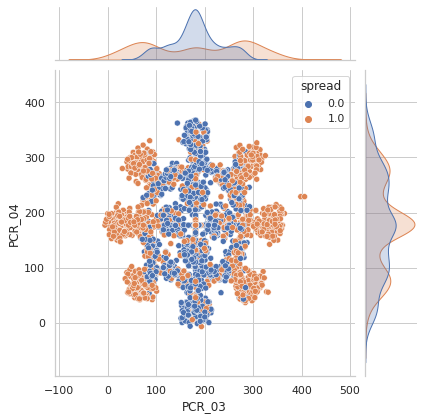

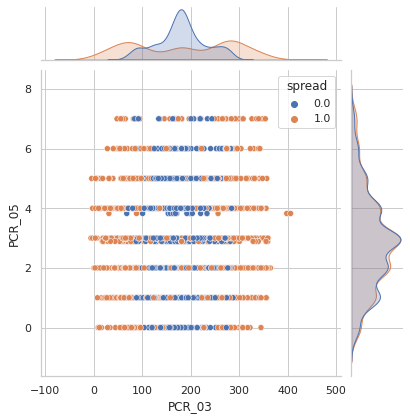

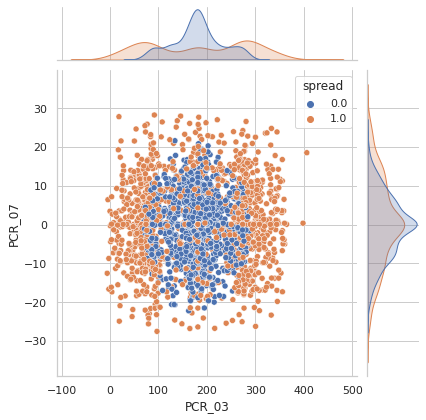

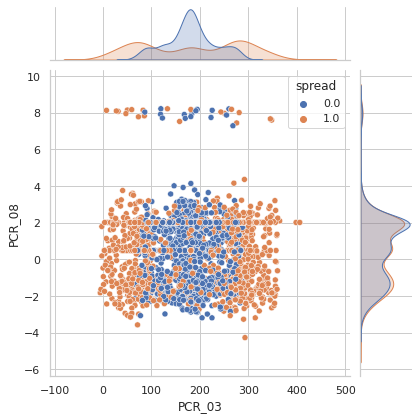

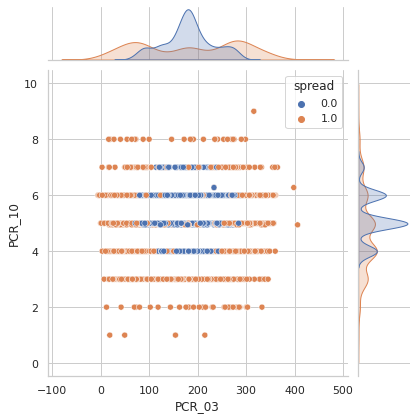

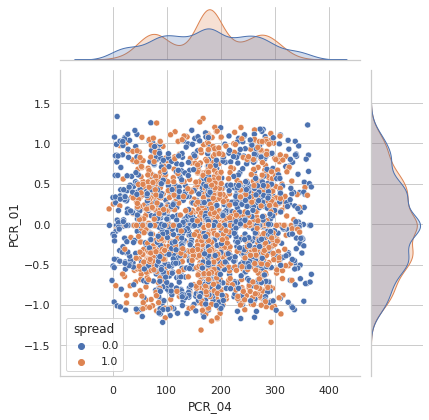

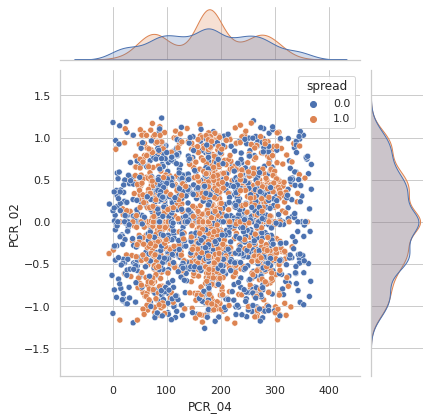

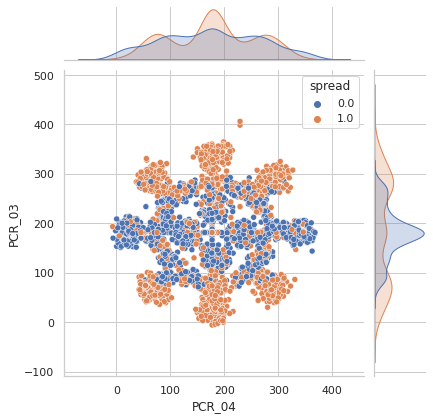

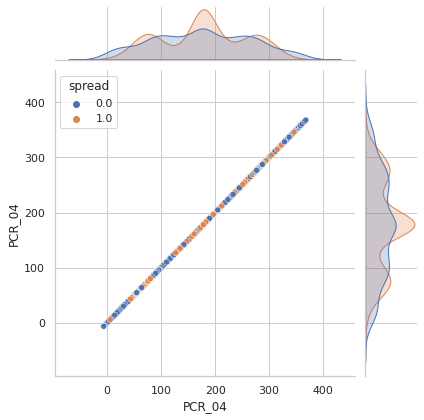

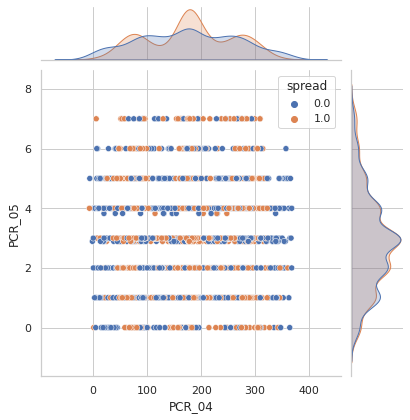

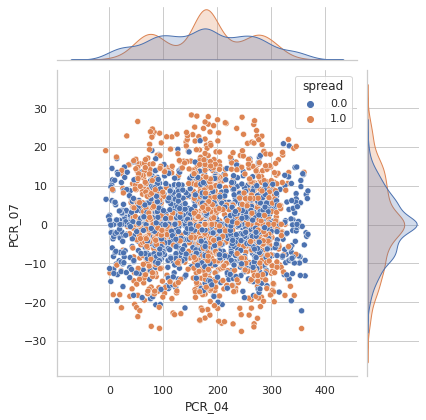

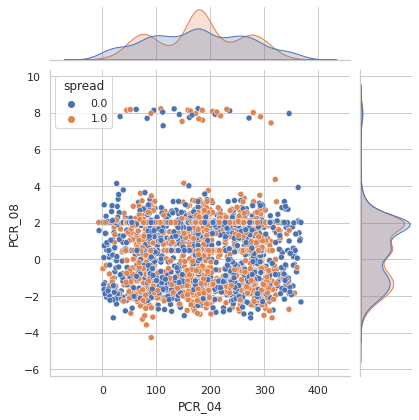

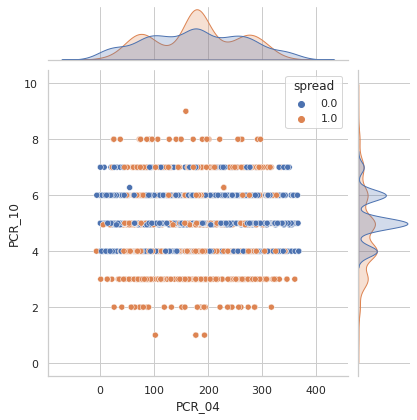

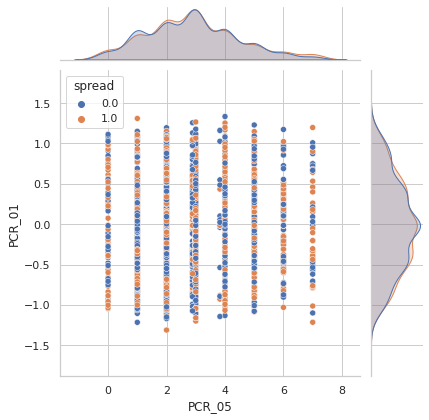

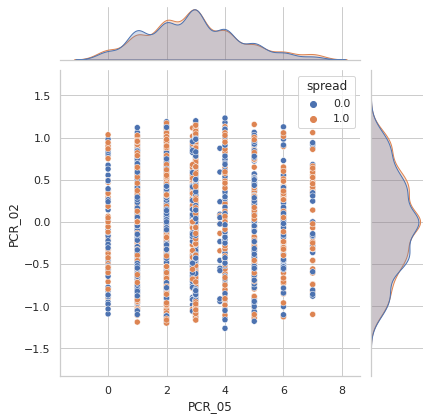

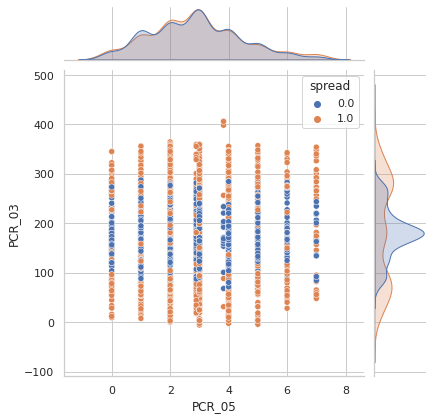

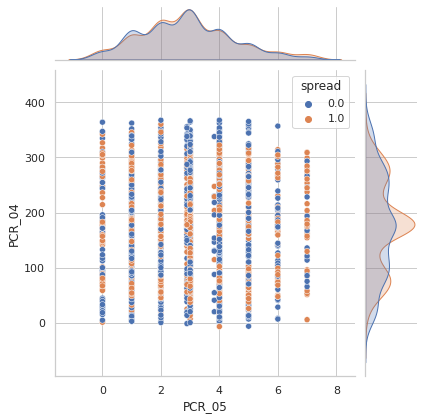

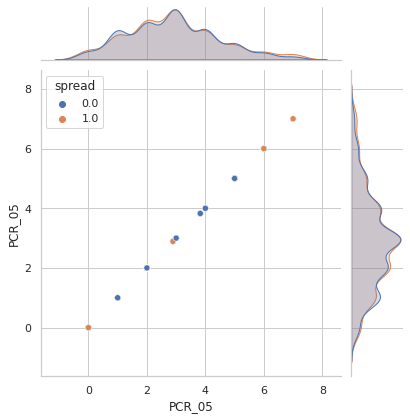

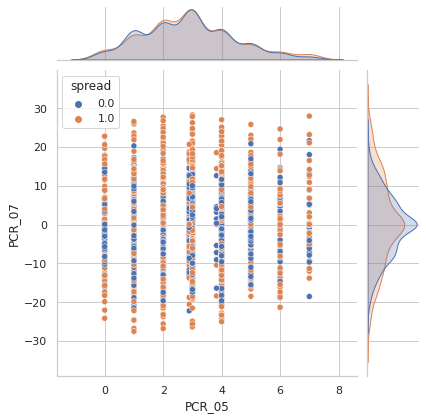

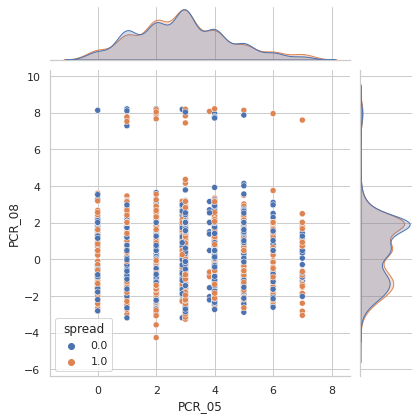

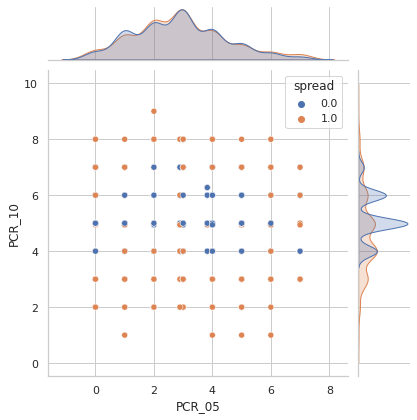

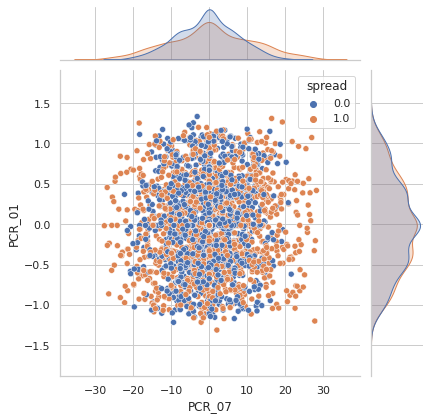

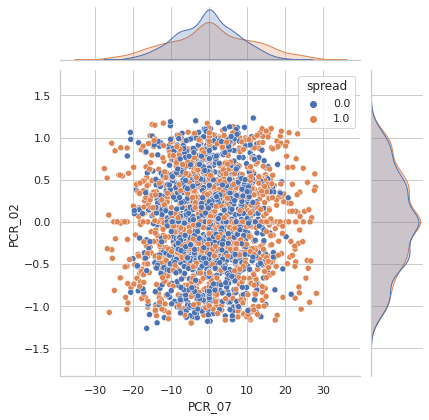

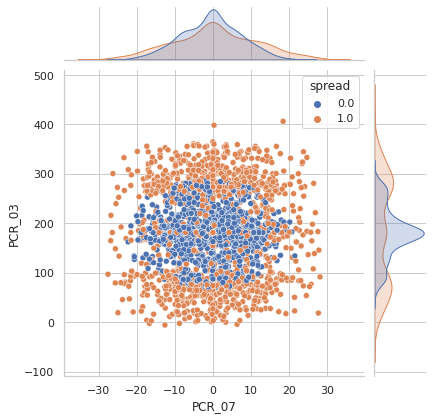

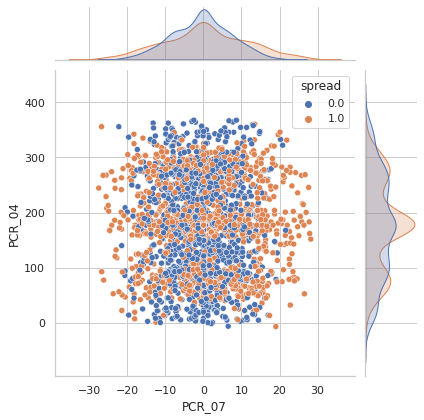

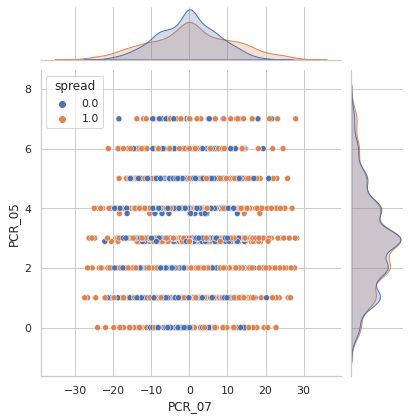

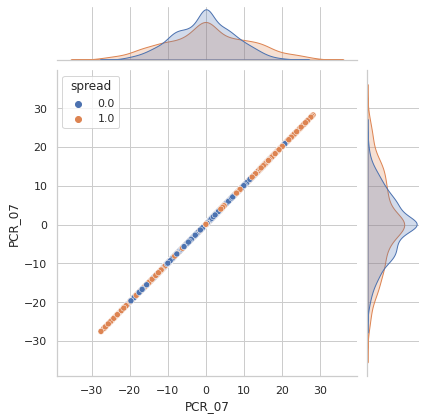

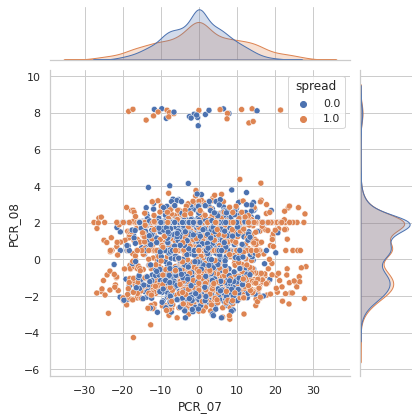

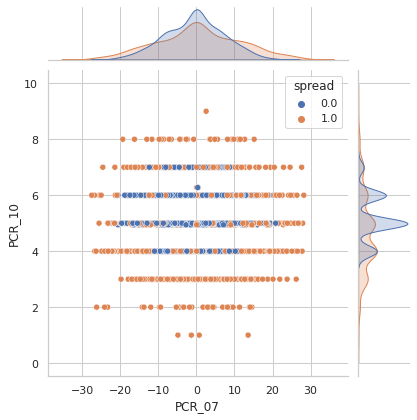

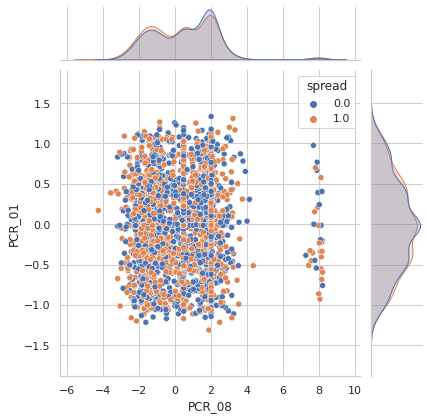

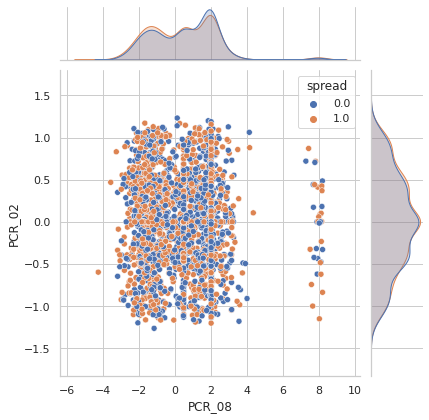

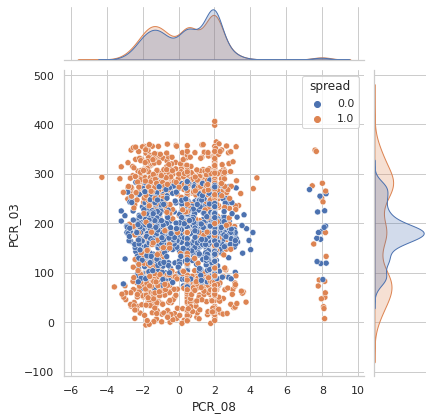

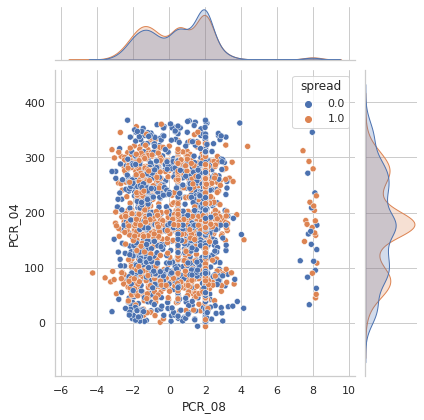

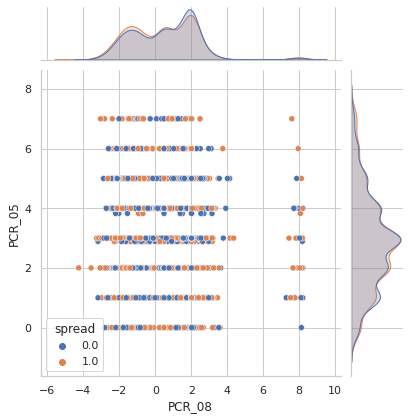

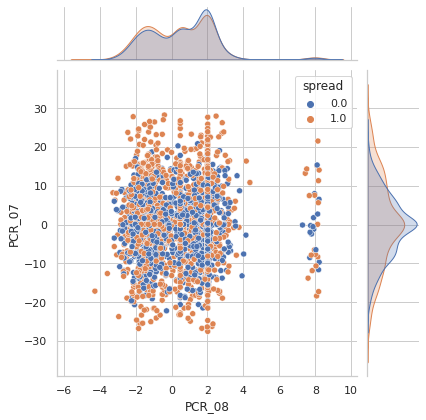

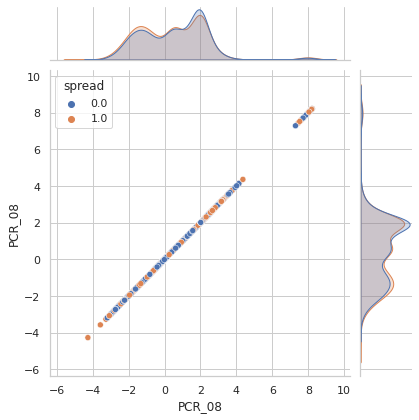

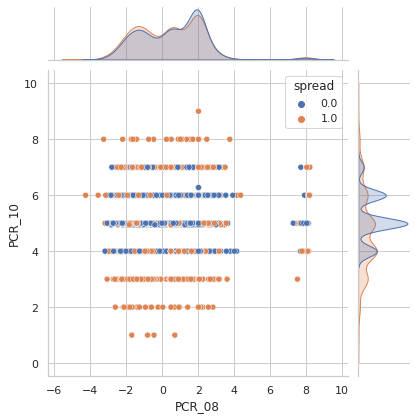

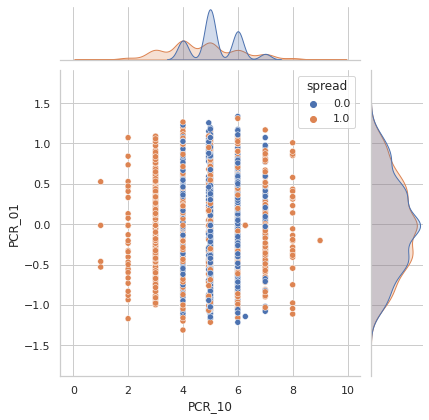

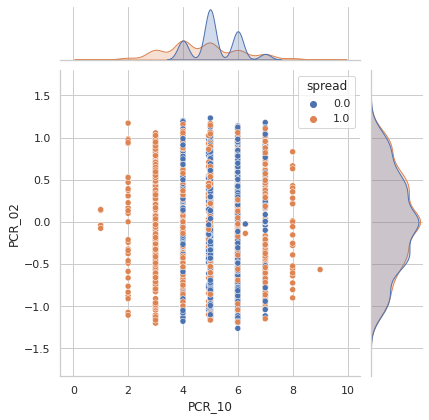

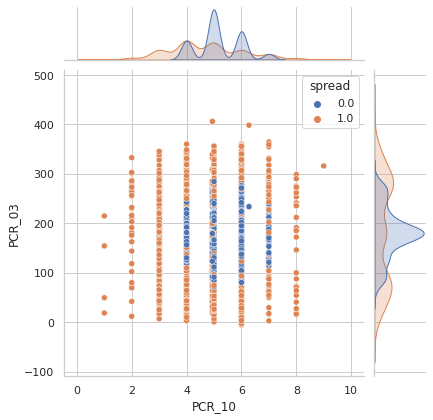

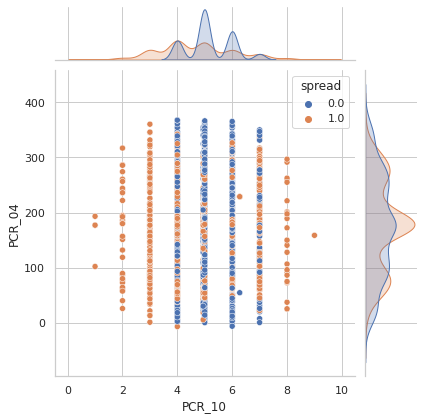

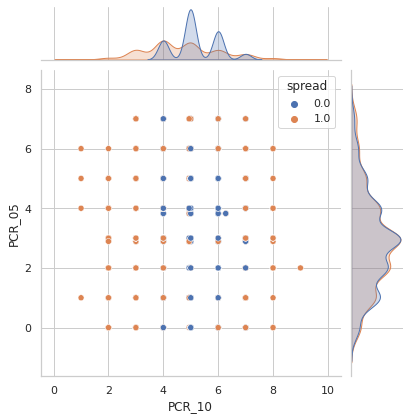

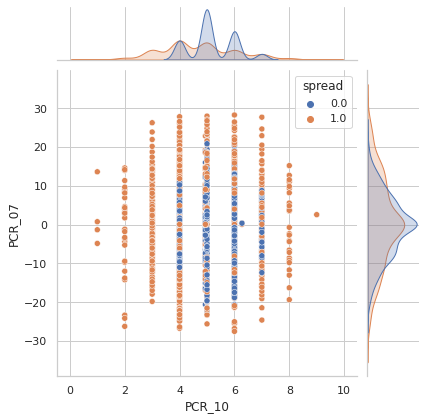

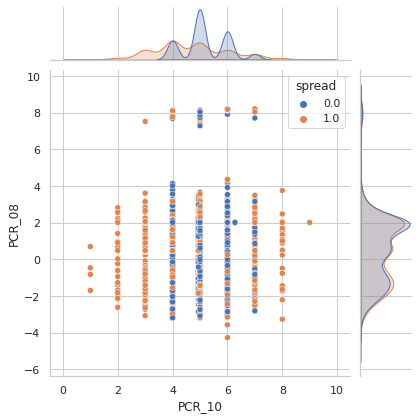

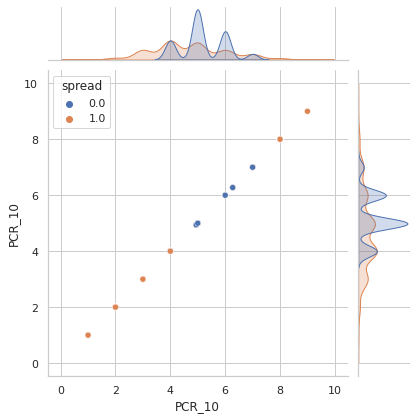

In [ ]:
features = ['PCR_01', 'PCR_02', 'PCR_03', 'PCR_04', 'PCR_05', 'PCR_07', 'PCR_08',  'PCR_10']

for i, column1 in enumerate(features):
  for j, column2 in enumerate(features):
    sns.jointplot(data=train, x=column1, y=column2, hue='spread')
    